# Reading data

In [47]:
import pandas as pd

iris = pd.read_csv('../data/iris.data')
iris.tail()

,f1,f2,f3,f4,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
iris.info

<bound method DataFrame.info of       f1   f2   f3   f4           class
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [49]:
iris.describe()

,f1,f2,f3,f4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Functions

In [50]:
import numpy as np


def randomGenotype():
    return np.random.randint(0, 3, size=150)

def initialPopulation(size):
    genotypes = np.array([randomGenotype() for _ in range(size)])
    genotypes = np.array([np.append(genotypes[i], 0.0) for i in range(size)])
    return genotypes

In [51]:
def distance(genotype):
    cluster0_indices, cluster1_indices, cluster2_indices = np.array([]), np.array([]), np.array([])

    for i in range(0, 150):
        if genotype[i] == 0:
            cluster0_indices = np.append(cluster0_indices, i)
        if genotype[i] == 1:
            cluster1_indices = np.append(cluster1_indices, i)
        if genotype[i] == 2:
            cluster2_indices = np.append(cluster2_indices, i)

    cluster0 = iris.iloc[cluster0_indices]
    cluster1 = iris.iloc[cluster1_indices]
    cluster2 = iris.iloc[cluster2_indices]

    difference0 = np.mean([
        np.linalg.norm(cluster0['f1'] - cluster0['f1'].mean()),
        np.linalg.norm(cluster0['f2'] - cluster0['f2'].mean()),
        np.linalg.norm(cluster0['f3'] - cluster0['f3'].mean()),
        np.linalg.norm(cluster0['f4'] - cluster0['f4'].mean())
    ])

    difference1 = np.mean([
        np.linalg.norm(cluster1['f1'] - cluster1['f1'].mean()),
        np.linalg.norm(cluster1['f2'] - cluster1['f2'].mean()),
        np.linalg.norm(cluster1['f3'] - cluster1['f3'].mean()),
        np.linalg.norm(cluster1['f4'] - cluster1['f4'].mean())
    ])

    difference2 = np.mean([
        np.linalg.norm(cluster2['f1'] - cluster2['f1'].mean()),
        np.linalg.norm(cluster2['f2'] - cluster2['f2'].mean()),
        np.linalg.norm(cluster2['f3'] - cluster2['f3'].mean()),
        np.linalg.norm(cluster2['f4'] - cluster2['f4'].mean())
    ])

    size_of_cluster0, size_of_cluster1, size_of_cluster2 = len(cluster0) / 150, len(cluster1) / 150, len(cluster2) / 150

    difference = np.sum([
        difference0 * size_of_cluster0,
        difference1 * size_of_cluster1,
        difference2 * size_of_cluster2
    ])

    return difference

In [52]:
def distances(genotypes):
    for genotype in genotypes:
        genotype[-1] = distance(genotype[:-1])
    return genotypes

In [53]:
def select(genotypes, number):
    gens = np.array(sorted(genotypes, key=lambda x: x[-1]))
    return gens[:number]

In [54]:
import random


def mutate(genotype):
    i = random.randint(0, 149)
    genotype[i] = random.randint(0, 2)
    return genotype

In [55]:
def crossover(genotypes, num_children, rate):
    gens = genotypes.copy()
    for parent1 in genotypes:
        for parent2 in genotypes:
            for i in range(num_children):
                child = np.array([random.randint(0, 1) for _ in range(150)])
                child = np.append(child, 0.0)
                for j in range(150):
                    if random.random() < 0.5:
                        child[j] = parent1[j]
                    else:
                        child[j] = parent2[j]

                if random.random() < rate:
                    child = mutate(child)

                gens = np.append(gens, [child], axis=0)
    return gens

# Evolution

In [56]:
first_population = initialPopulation(1000)
first_population = distances(first_population)
first_population = select(first_population, 30)

new_genotypes = first_population.copy()
best_distances = []


for i in range(150):
    new_genotypes = crossover(new_genotypes, 2, 0.1)
    new_genotypes = distances(new_genotypes)
    new_genotypes = select(new_genotypes, 10)
    print("Gen " + str(i) + " best distance" +': ' + str(new_genotypes[0][-1]))
    best_distances.append(new_genotypes[0][-1])

Gen 0 best distance: 6.164430430680641
Gen 1 best distance: 5.915954706475325
Gen 2 best distance: 5.7073789092340546
Gen 3 best distance: 5.450598146701283
Gen 4 best distance: 5.149035685303513
Gen 5 best distance: 4.996596035336099
Gen 6 best distance: 4.788994830062113
Gen 7 best distance: 4.620056568802911
Gen 8 best distance: 4.34498519415192
Gen 9 best distance: 4.200406083776391
Gen 10 best distance: 4.069344713382094
Gen 11 best distance: 3.9442301771213466
Gen 12 best distance: 3.8323458562146397
Gen 13 best distance: 3.7932708994136988
Gen 14 best distance: 3.751603407533336
Gen 15 best distance: 3.7235525758975996
Gen 16 best distance: 3.7235525758975996
Gen 17 best distance: 3.7235525758975996
Gen 18 best distance: 3.7235525758975996
Gen 19 best distance: 3.697270465656066
Gen 20 best distance: 3.697270465656066
Gen 21 best distance: 3.638331268764688
Gen 22 best distance: 3.638331268764688
Gen 23 best distance: 3.5988860702308147
Gen 24 best distance: 3.571087342287371
Ge

# Results

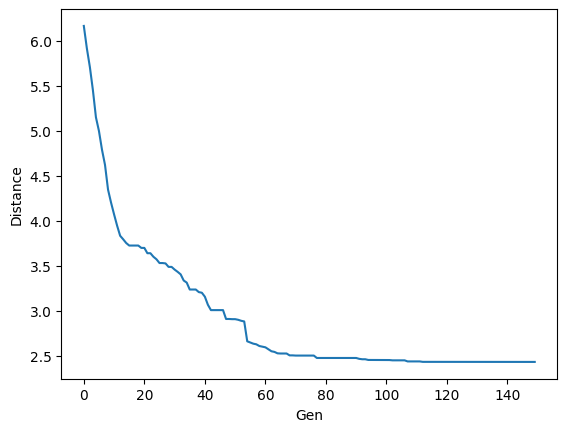

In [57]:
from matplotlib import pyplot as plt

plt.plot(best_distances)
plt.ylabel('Distance')
plt.xlabel('Gen')
plt.show()

# Accuracy

In [58]:
from sklearn import metrics

def cluster_accuracy(predicted_labels):
    actual_labels = iris['class']

    label_permutations = [
        ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
        ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'],
        ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'],
        ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'],
        ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'],
        ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
    ]

    max_perm = 0
    best_labels = None

    for labels_order in label_permutations:
        actual_labels_permuted = actual_labels.replace({
            labels_order[0]: 0.0,
            labels_order[1]: 1.0,
            labels_order[2]: 2.0
        })

        perm_accuracy = np.mean(actual_labels_permuted == predicted_labels)

        if perm_accuracy > max_perm:
            max_perm = perm_accuracy
            best_labels = actual_labels_permuted

    return best_labels, metrics.accuracy_score(best_labels, predicted_labels)

In [59]:
best_genotype = new_genotypes[0]

predicted_labels = best_genotype[:-1]
best_labels, accuracy = cluster_accuracy(predicted_labels)

print('Accuracy: ' + str(accuracy))

Accuracy: 0.8933333333333333


# Actual clusters

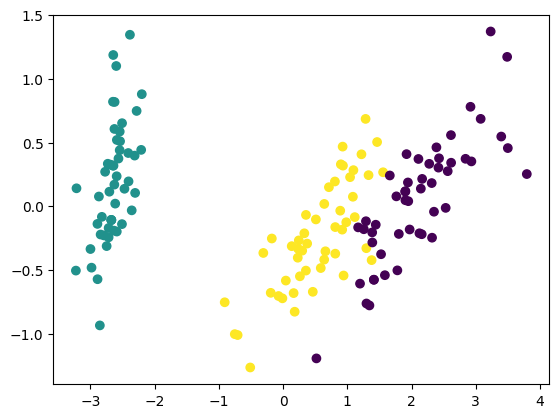

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris.iloc[:, :-1])
iris_pca = pca.transform(iris.iloc[:, :-1])

plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=best_labels)
plt.show()

# Predicted clusters

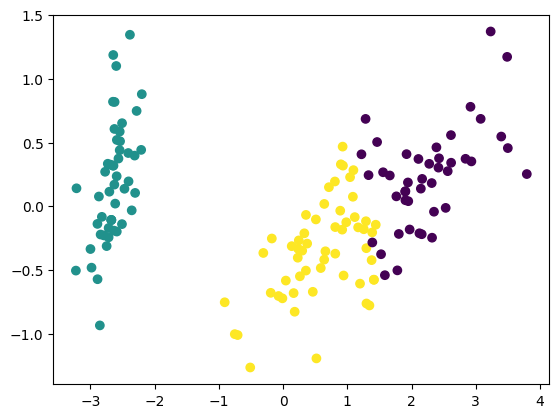

In [61]:
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=predicted_labels)
plt.show()

# K-means

Accuracy: 0.8866666666666667


C:\Users\nimae\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


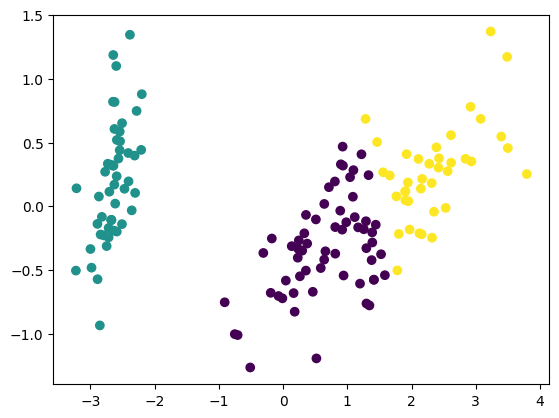

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(iris_pca)
kmeans_labels = kmeans.labels_

_, kmeans_accuracy = cluster_accuracy(kmeans_labels)
print('Accuracy: ' + str(kmeans_accuracy))

plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=kmeans_labels)
plt.show()